In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from random import uniform
from config import api_key

In [2]:
# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)
cities_df

,City,Country


## Generate a list of cites from latitudes and longitudes

In [3]:
# Randomly generate a list of 1500 cities. Use 10 to test. 50 is good to test for duplicates. 
for x in range(200):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)
cities_df.head()

,City,Country
0,esperance,au
1,tiksi,ru
2,san antonio,cl
3,kapaa,us
4,dunedin,nz


In [4]:
#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      142
City       142
Country    142
dtype: int64

## Perform API Calls

In [5]:
#Create a df to add all the data from the API calls.
column_names = ["City","Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)


In [6]:
# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Esperance AU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=esperance
------------------------
Proceesing: City #  2  |  Tiksi RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tiksi
City not found, skipping...
------------------------
Proceesing: City #  3  |  Kapaa US
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kapaa
------------------------
Proceesing: City #  4  |  Dunedin NZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=dunedin
------------------------
Proceesing: City #  5  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=ilulissat
City not found, skipping...
City not found, skipping...
------------------------
P

------------------------
Proceesing: City #  46  |  Hofn IS
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=hofn
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  47  |  Balclutha NZ
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kaitangata
------------------------
Proceesing: City #  48  |  Barenburg DE
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=barentsburg
City not found, skipping...
------------------------
Proceesing: City #  49  |  Cabedelo BR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=cabedelo
------------------------
Proceesing: City #  50  |  Jinhua CN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=samusu
------------------------
Proceesing: City

------------------------
Proceesing: City #  91  |  Kavaratti IN
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=kavaratti
------------------------
Proceesing: City #  92  |  Peterhead GB
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=peterhead
------------------------
Proceesing: City #  93  |  Amparihy MG
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=taolanaro
------------------------
Proceesing: City #  94  |  Tupik RU
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=tupik
------------------------
Proceesing: City #  95  |  Biggar GB
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de717437b6555b2efaba1b1&units=IMPERIAL&q=biggar
------------------------
Proceesing: City #  96  |  Atar MR
http://api.openweathermap.org/data/2.5/weather?appid=72507afc9de7

In [7]:
clean_cities_df

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Esperance,AU,64.59,-33.87,121.9,93,8,6.49
1,Tiksi,RU,9.87,71.69,128.87,82,80,12.41
3,Kapaa,US,68,22.08,-159.32,77,75,4.7
4,Dunedin,NZ,36.69,-45.87,170.5,91,0,2.8
5,Ilulissat,GL,10.4,69.22,-51.1,51,75,16.11
8,Kilrush,IE,44.6,52.64,-9.48,93,75,9.17
9,Vao,NC,71.11,-22.67,167.48,100,0,15.66
10,Kahului,US,65.08,20.89,-156.47,88,40,4.36
11,Hasaki,JP,43.65,35.73,140.83,87,75,1.12
12,Rikitea,PF,72.42,-23.12,-134.97,100,12,9.51


In [8]:
clean_cities_df.count()

City                111
Country             111
Temperature (F)     111
Latitude            111
Longitude           111
Humidity (%)        111
Cloudiness (%)      111
Wind Speed (mph)    111
dtype: int64

In [21]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Esperance,AU,64.59,-33.87,121.9,93,8,6.49
1,Tiksi,RU,9.87,71.69,128.87,82,80,12.41
2,Kapaa,US,68,22.08,-159.32,77,75,4.7
3,Dunedin,NZ,36.69,-45.87,170.5,91,0,2.8
4,Ilulissat,GL,10.4,69.22,-51.1,51,75,16.11


In [10]:
# Save data to a CSV file
#clean_cities_df.to_csv("City_Data.csv")

## Latitude vs. Temperature 

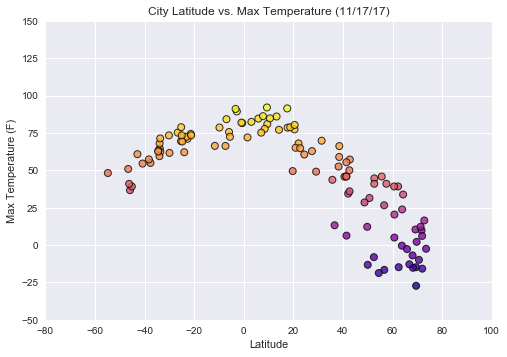

In [22]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Max Temperature (11/17/17)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity (%) 

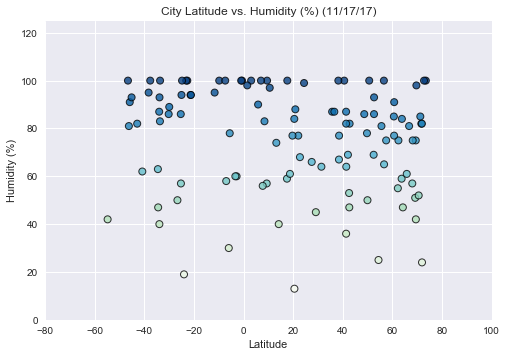

In [23]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Humidity (%) (11/17/17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 125])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%) 

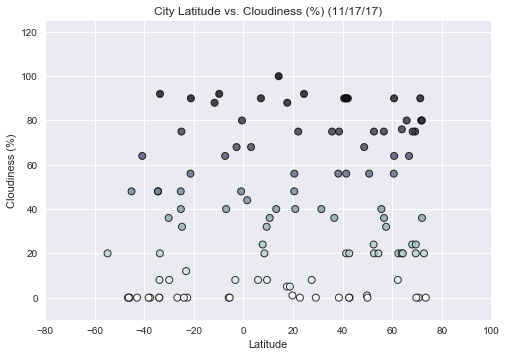

In [24]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Cloudiness (%) (11/17/17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed (mph) 

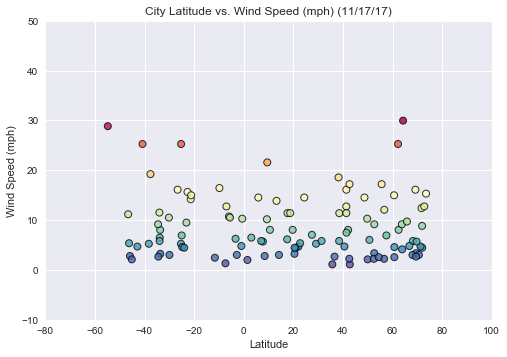

In [25]:
#Build a scatter plot for Latitude vs. Wind Speed (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title("City Latitude vs. Wind Speed (mph) (11/17/17)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
#plt.savefig("output_analysis/Latitude_Temperature.png")

# Show plot
plt.show()